# Covid-19 Data Visualization using Python, Matplotlib and Plotly

## Dharmendra Kanjaria

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
import time
import datetime
from plotly.figure_factory import create_table
import plotly.graph_objs as go
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
import plotly.express as px
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
# Importing Plotly
import plotly.offline as py
from wordcloud import WordCloud
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

## `New York Time API` Class Defination

In [3]:
class NYTCovid:
    def __init__(self):
        from datetime import date
        self.statedf = None
        self.countydf = None
        self._stateupdated = False
        self._countyupdated = False
        self._processed = False
        self._today = date.today()

    def today(self):
        print("Today is:", self._today)

    def updateState(self,
                    url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"):
        url = url
        s = requests.get(url).content
        self.statedf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.statedf['date'] = pd.to_datetime(
            self.statedf['date'], format='%Y-%m-%d')
        self._stateupdated = True

    def updateCounty(self,
                     url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"):
        url = url
        s = requests.get(url).content
        self.countydf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.countydf['date'] = pd.to_datetime(
            self.countydf['date'], format='%Y-%m-%d')
        self._countyupdated = True

    def dateUpdate(self):
        if self._stateupdated:
            print("Date of the latest data:",
                  self.statedf.iloc[-1]['date'].date())
        else:
            print("Data has not been updated even once!")

    def peek(self):
        if self._stateupdated:
            print("First 5 rows of the state data")
            print("="*50)
            print(self.statedf.head())
        if self._countyupdated:
            print()
            print("First 5 rows of the county data")
            print("="*50)
            print(self.countydf.head())

    def process(self):
        # TurnOff Warnings if no updates
        pd.set_option('mode.chained_assignment', None)
        self.statedict = {}
        self.countydict = {}
        print("Processing...")
        t1 = time.time()
        if self._stateupdated:
            self.statelist = list(self.statedf['state'].unique())
            for s in self.statelist:
                state_df = self.statedf[self.statedf['state'] == s]
                state_df['newcases'] = state_df['cases'].diff()
                state_df['newdeaths'] = state_df['deaths'].diff()
                self.statedict[s] = state_df
        if self._countyupdated:
            self.countylist = list(self.countydf['county'].unique())
            for c in self.countylist:
                county_df = self.countydf[self.countydf['county'] == c]
                county_df['newcases'] = county_df['cases'].diff()
                county_df['newdeaths'] = county_df['deaths'].diff()
                self.countydict[c] = county_df
        self._processed = True
        t2 = time.time()
        delt = round(t2-t1, 3)
        print("Finished. Took {} seconds".format(delt))

    def plot_state(self,
                   state='Maryland',
                   last_30_days=False):
        """
        Plots statewise data
        """
        if self._processed == False:
            print("Data not processed yet. Cannot plot statewise.")
            return None

        s = str(state)
        assert s in self.statelist, "Input does not appear in the list of states. Possibly wrong name/spelling"
        df = self.statedict[s]

        dates = df['date']
        cases = df['cases']
        deaths = df['deaths']
        newcases = df['newcases']
        newdeaths = df['newdeaths']

        if last_30_days:
            dates = df['date'][-31:-1]
            cases = df['cases'][-31:-1]
            deaths = df['deaths'][-31:-1]
            newcases = df['newcases'][-31:-1]
            newdeaths = df['newdeaths'][-31:-1]

        plt.figure(figsize=(14, 4))
        if last_30_days:
            plt.title(
                "Cumulative cases in {}, for last 30 days".format(s), fontsize=18)
        else:
            plt.title("Cumulative cases in {}".format(s), fontsize=18)
        plt.bar(x=dates, height=cases, color='blue', edgecolor='k')
        plt.xticks(rotation=45, fontsize=14)
        plt.show()

        print()

        plt.figure(figsize=(14, 4))
        if last_30_days:
            plt.title(
                "Cumulative deaths in {}, for last 30 days".format(s), fontsize=18)
        else:
            plt.title("Cumulative deaths in {}".format(s), fontsize=18)
        plt.bar(x=dates, height=deaths, color='red', edgecolor='k')
        plt.xticks(rotation=45, fontsize=14)
        plt.show()

        print()

        plt.figure(figsize=(14, 4))
        if last_30_days:
            plt.title("New cases in {}, for last 30 days".format(s), fontsize=18)
        else:
            plt.title("New cases in {}".format(s), fontsize=18)
        plt.bar(x=dates, height=newcases, color='yellow', edgecolor='k')
        plt.xticks(rotation=45, fontsize=14)
        plt.show()

        print()

        plt.figure(figsize=(14, 4))
        if last_30_days:
            plt.title("New deaths in {}, for last 30 days".format(s), fontsize=18)
        else:
            plt.title("New deaths in {}".format(s), fontsize=18)
        plt.bar(x=dates, height=newdeaths, color='orange', edgecolor='k')
        plt.xticks(rotation=45, fontsize=14)
        plt.show()

    def plot_multi_state(self,
                         states=['Maryland', 'Virginia', 'New York'],
                         last_30_days=False):
        """
        Plots multiple states data in a single plot for comparison
        """
        states = states
        plt.figure(figsize=(14, 4))
        if last_30_days:
            plt.title("Cumulative cases, for last 30 days", fontsize=18)
            colors = []
            for s in states:
                color = tuple(np.round(np.random.random(3), 2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'][-31:-1],
                         self.statedict[s]['cases'][-31:-1],
                         color=color,
                         linewidth=2)
                plt.xticks(rotation=45, fontsize=14)
            plt.legend(states, fontsize=14)
            plt.show()
        else:
            plt.title("Cumulative cases", fontsize=18)
            colors = []
            for s in states:
                color = tuple(np.round(np.random.random(3), 2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'],
                         self.statedict[s]['cases'],
                         color=color,
                         linewidth=2)
                plt.xticks(rotation=45, fontsize=14)
            plt.legend(states, fontsize=14)
            plt.show()

    def rankState(self,
                  N=5,
                  daterank=None):
        """
        Ranks the states in a bar chart
        Arguments:
            N: Top N states to be ranked
            date: Date at which the ranking is done. 
                  Must be a string in the form '2020-3-27'
        """
        from datetime import date

        cases = {}
        deaths = {}
        newcases = {}
        newdeaths = {}

        if daterank == None:
            d = self.statedf.iloc[-1]['date'].date()
        else:
            d = datetime.datetime.strptime(daterank, '%Y-%m-%d').date()

        for s in self.statedict:
            df = self.statedict[s]
            for i in range(len(df)):
                if df['date'].iloc[i].date() == d:
                    cases[s] = df.iloc[i]['cases']
                    deaths[s] = df.iloc[i]['deaths']
                    newcases[s] = df.iloc[i]['newcases']
                    newdeaths[s] = df.iloc[i]['newdeaths']

        sorted_cases = sorted(((value, key)
                              for (key, value) in cases.items()), reverse=True)
        sorted_cases = sorted_cases[:N]
        sorted_deaths = sorted(((value, key)
                               for (key, value) in deaths.items()), reverse=True)
        sorted_deaths = sorted_deaths[:N]
        sorted_newcases = sorted(
            ((value, key) for (key, value) in newcases.items()), reverse=True)
        sorted_newcases = sorted_newcases[:N]
        sorted_newdeaths = sorted(
            ((value, key) for (key, value) in newdeaths.items()), reverse=True)
        sorted_newdeaths = sorted_newdeaths[:N]

        _, axs = plt.subplots(2, 2, figsize=(15, 9))
        axs = axs.ravel()
        axs[0].bar(x=[val[1] for val in sorted_cases],
                   height=[val[0] for val in sorted_cases],
                   color='blue', edgecolor='k')
        axs[0].set_title("Cumulative cases on {}".format(str(d)),
                         fontsize=15)
        axs[1].bar(x=[val[1] for val in sorted_deaths],
                   height=[val[0] for val in sorted_deaths],
                   color='red', edgecolor='k')
        axs[1].set_title("Cumulative deaths on {}".format(str(d)),
                         fontsize=15)
        axs[2].bar(x=[val[1] for val in sorted_newcases],
                   height=[val[0] for val in sorted_newcases],
                   color='yellow', edgecolor='k')
        axs[2].set_title("New cases on {}".format(str(d)),
                         fontsize=15)
        axs[3].bar(x=[val[1] for val in sorted_newdeaths],
                   height=[val[0] for val in sorted_newdeaths],
                   color='orange', edgecolor='k')
        axs[3].set_title("New deaths on {}".format(str(d)),
                         fontsize=15)
        plt.show()


### Initialize Class object instance

In [4]:
n = NYTCovid()

### Today?

In [5]:
n.today()

Today is: 2022-11-21


### Update state data (pulls directly from the NY Times Github repo)

In [6]:
n.updateState()

### Take a peek (only state data will show up)

In [7]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0


### Updated county data (fatching directly from github repo)

In [8]:
n.updateCounty()

### Another peek (county data will show up this time)

In [9]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0

First 5 rows of the county data
        date     county       state     fips  cases  deaths
0 2020-01-21  Snohomish  Washington  53061.0      1     0.0
1 2020-01-22  Snohomish  Washington  53061.0      1     0.0
2 2020-01-23  Snohomish  Washington  53061.0      1     0.0
3 2020-01-24       Cook    Illinois  17031.0      1     0.0
4 2020-01-24  Snohomish  Washington  53061.0      1     0.0


### Get most updated data (may take some time)

NY Times dataset only records the cumulative cases and deaths by date. Also, the dataset is flat and there is no statewise or countywise breakup. This function processes the dataset, calculates new cases for each day, and creates internal dictionaries to store statewise and countywise data for plotting and analysis.

In [10]:
n.process()

Processing...
Finished. Took 262.732 seconds


### Checking a state dataset (first 10 rows)

In [11]:
n.statedict['Maryland'].head(10)

date     state  fips  cases  deaths  newcases  newdeaths
307 2020-03-05  Maryland    24      3       0       NaN        NaN
331 2020-03-06  Maryland    24      3       0       0.0        0.0
361 2020-03-07  Maryland    24      3       0       0.0        0.0
396 2020-03-08  Maryland    24      5       0       2.0        0.0
432 2020-03-09  Maryland    24      6       0       1.0        0.0
469 2020-03-10  Maryland    24      9       0       3.0        0.0
510 2020-03-11  Maryland    24     13       0       4.0        0.0
557 2020-03-12  Maryland    24     13       0       0.0        0.0
606 2020-03-13  Maryland    24     18       0       5.0        0.0
657 2020-03-14  Maryland    24     27       0       9.0        0.0

### Checking a county dataset (first 10 rows)

In [12]:
n.countydict['Baltimore'].head(10)

date     county     state     fips  cases  deaths  newcases  \
1249 2020-03-11  Baltimore  Maryland  24005.0      1     0.0       NaN   
1467 2020-03-12  Baltimore  Maryland  24005.0      1     0.0       0.0   
1745 2020-03-13  Baltimore  Maryland  24005.0      2     0.0       1.0   
2085 2020-03-14  Baltimore  Maryland  24005.0      3     0.0       1.0   
2484 2020-03-15  Baltimore  Maryland  24005.0      3     0.0       0.0   
2931 2020-03-16  Baltimore  Maryland  24005.0      4     0.0       1.0   
3432 2020-03-17  Baltimore  Maryland  24005.0      4     0.0       0.0   
4014 2020-03-18  Baltimore  Maryland  24005.0      7     0.0       3.0   
4716 2020-03-19  Baltimore  Maryland  24005.0     13     0.0       6.0   
5534 2020-03-20  Baltimore  Maryland  24005.0     13     1.0       0.0   

      newdeaths  
1249        NaN  
1467        0.0  
1745        0.0  
2085        0.0  
2484        0.0  
2931        0.0  
3432        0.0  
4014        0.0  
4716        0.0  
5534        1.0

### What is the latest date of the update?

In [13]:
n.dateUpdate()

Date of the latest data: 2022-11-20


### Plotting data for a particular state
This will plot four plots

- Cumulative cases
- Cumulative deaths
- New cases
- New deaths

User can choose to plot all the data or just the data from the last 30 days by making `last_30_days=True` in the function call.

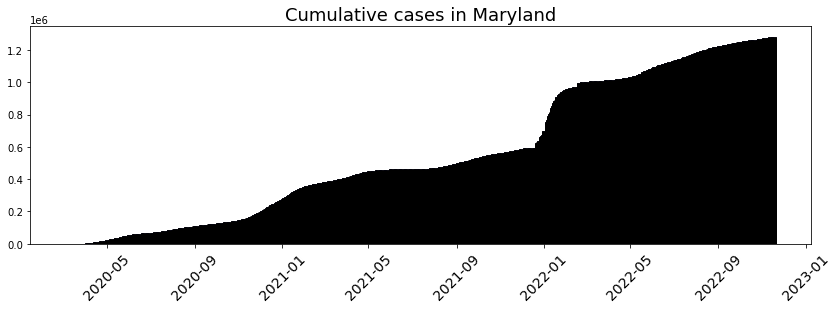

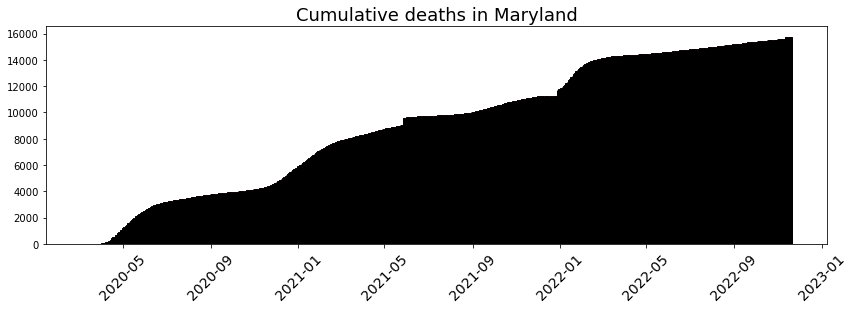

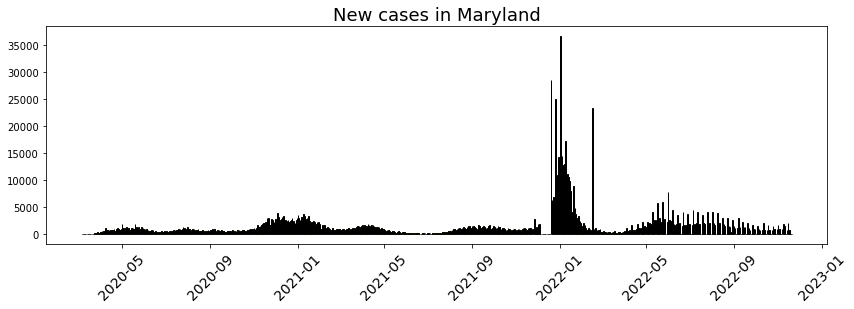

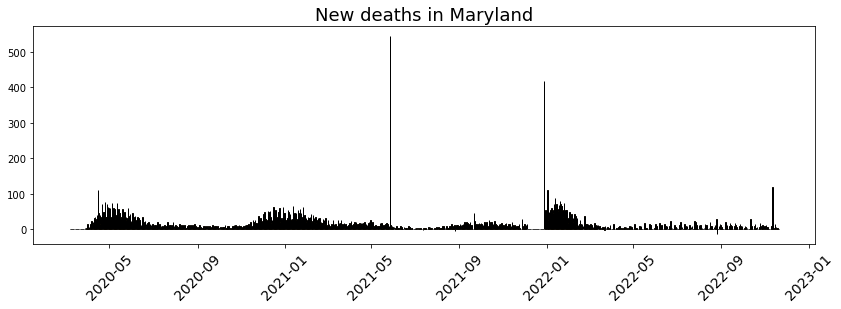

In [14]:
n.plot_state('Maryland')

### Plotting Maryland data for the last 30 days

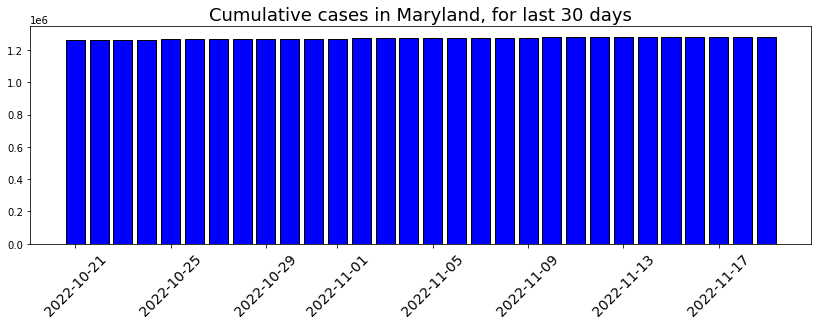

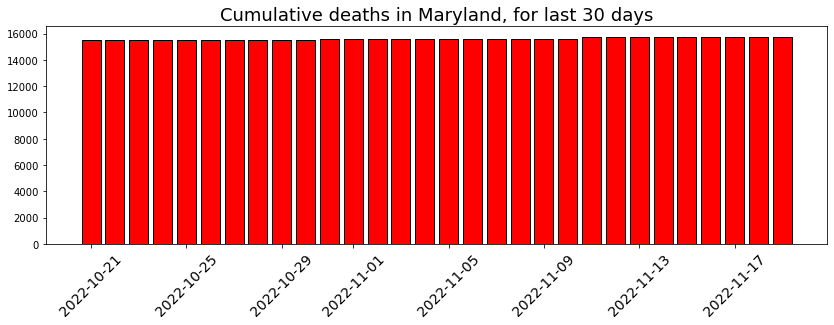

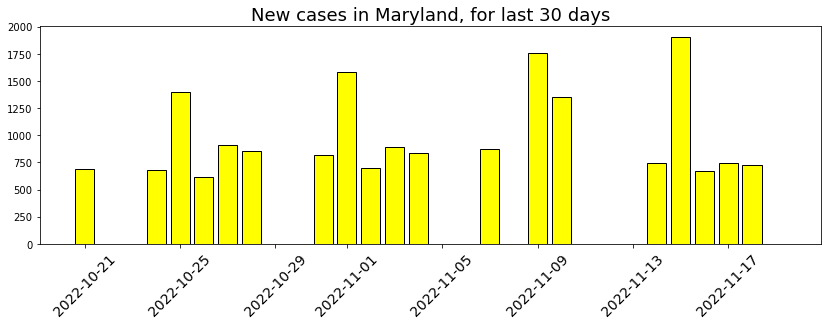

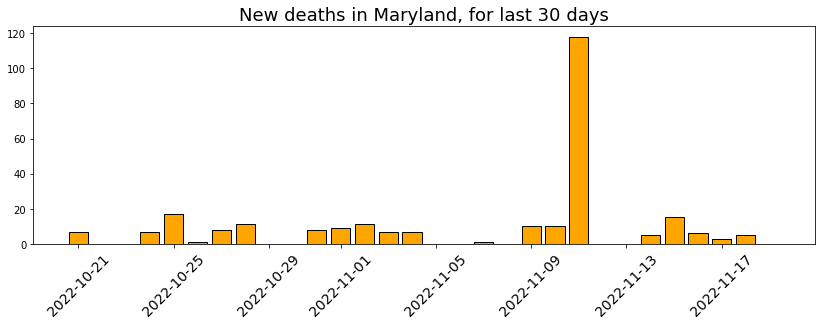

In [15]:
n.plot_state('Maryland',last_30_days=True)

### Plotting Line Chart to check multiple states

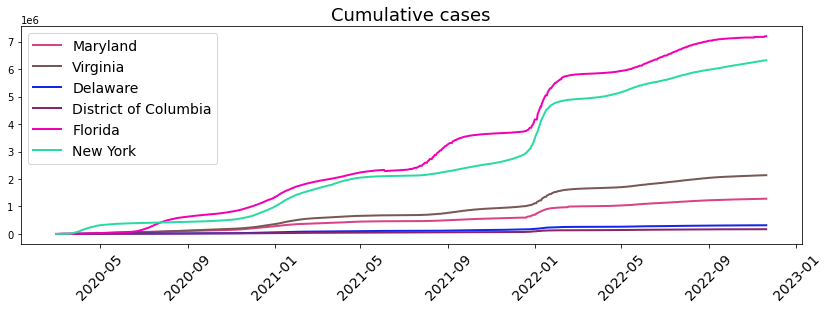

In [16]:
n.plot_multi_state(states=['Maryland','Virginia','Delaware','District of Columbia','Florida', 'New York'],last_30_days=False)

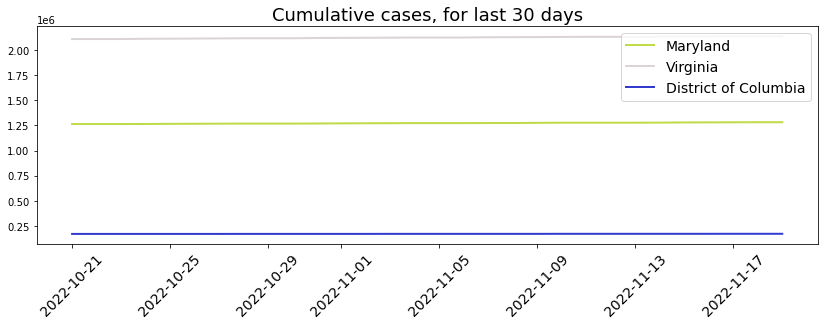

In [18]:
n.plot_multi_state(states=['Maryland','Virginia','District of Columbia'],last_30_days=True)

### Plotting ranked bar charts of top few states

Plots bar charts (sorted) of top _N_ states where _N_ can be specified by the user. Also, the user can specify the date at which the ranking is displayed. If the date is not specified (i.e. `None`) then the latest data is used for ranking.

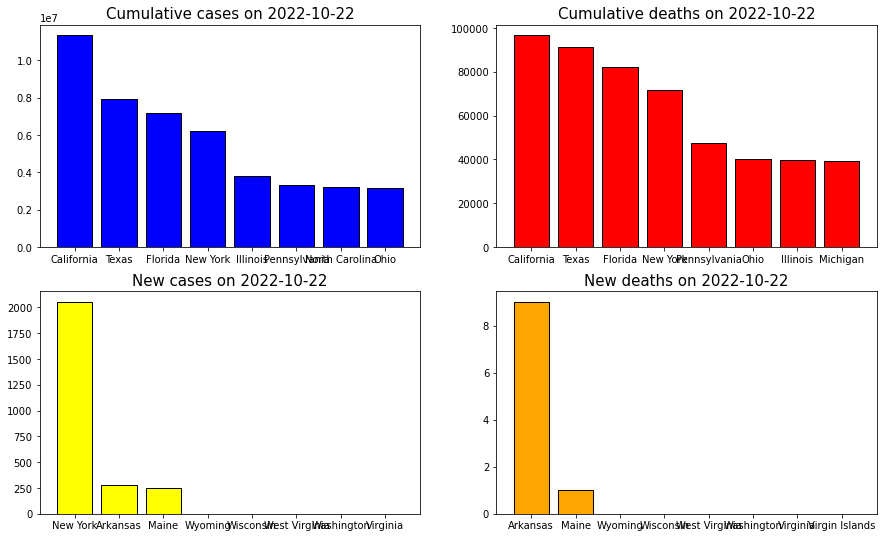

In [19]:
n.rankState(N=8,daterank='2022-10-22')

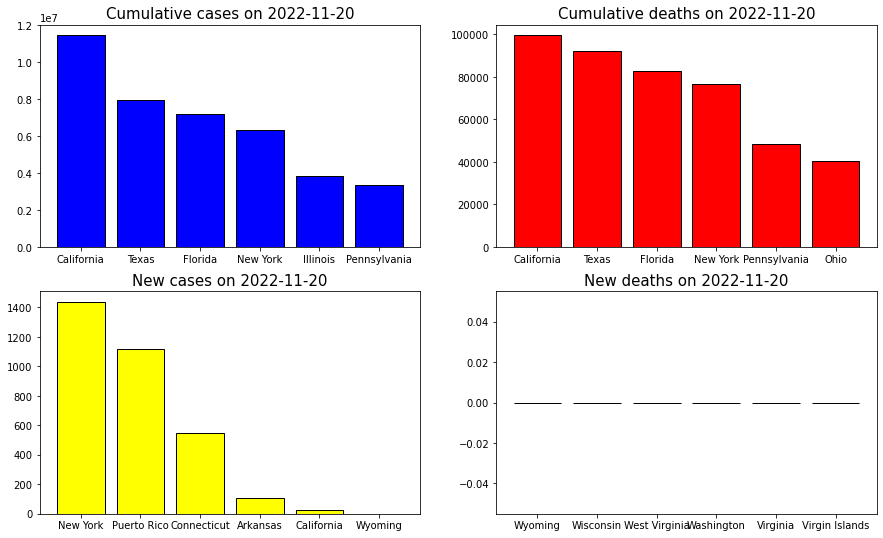

In [20]:
n.rankState(N=6)

## Data visualization using Plotly

In [6]:
# Import datasets and create dataframes
covid = pd.read_csv("covid.csv", nrows=10000)
cvd_group = pd.read_csv("covid_grouped.csv", nrows=10000)
cvd_death = pd.read_csv("coviddeath.csv", nrows=10000)
new_county = pd.read_csv('new_county.csv', nrows=10000)
state = pd.read_csv('state.csv', nrows=10000)

In [8]:
us_df = pd.concat([state, new_county])
usdf = us_df.drop('Unnamed: 0', axis=1)

## Sunburst Chart

In [24]:
fig = px.sunburst(covid,path=['Country/Region', 'Continent'],values='TotalTests')
fig.show()

## Pie Chart

In [9]:
fig = px.pie(usdf, values='cases', names='state')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

## Interactive Bar Chart

In [25]:
px.bar(covid.head(15), x = 'Country/Region',
y = 'TotalCases',color = 'TotalCases',      
height = 500,hover_data = ['Country/Region', 'Continent'])

## Horizontal BarGraph

In [26]:
px.bar(covid.head(15), x = 'TotalTests', y = 'Country/Region',
color = 'TotalTests',orientation ='h', height = 500,
hover_data = ['Country/Region', 'Continent'])

## Stacked BarChart
#### Confirmed Cases Vs Death by Countries

In [27]:
px.bar(cvd_group, x="Date", y="Confirmed", color="Confirmed",
hover_data=["Confirmed", "Date", 'Country/Region'], height=400)

## Scatter Plot 
#### Confirmed Cases Vs. Death

In [28]:
df_US= cvd_group.loc[cvd_group["Country/Region"]=="US"]
px.scatter(df_US, x="Confirmed", y="Deaths", height=400)

## Line Chart
#### New Cases by Date

In [29]:
px.line(df_US,x="Date", y="New cases", height=400)

## Animated Choropleth Map
#### Confirmed Covid Cases by Date and Countries

In [30]:
px.choropleth(cvd_group,
locations="iso_alpha",
color="Confirmed",
hover_name="Country/Region",
color_continuous_scale="Blues",animation_frame="Date")

## Earth Projection

In [32]:
px.choropleth(cvd_group,
locations='iso_alpha',
color="Recovered",
hover_name="Country/Region",
color_continuous_scale="RdYlGn",
projection="natural earth",animation_frame="Date" )

## Active Cases

In [33]:
df = covid
fig = px.choropleth(df, locations="iso_alpha",
                    color="ActiveCases", # lifeExp is a column of gapminder
                    hover_name="Country/Region", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()